### Load data and import packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

In [2]:
users = pd.read_csv('../takehome_users.csv', encoding='ISO-8859-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


## Part 1 - Data Wrangling

#### Check data for:
1. missing values
2. non-sensical values
3. duplicate values

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


The data has some missing values in two columns that will have to be examined. 

In [4]:
## First convert 'creation_time' to datetime object
users['creation_time'] = pd.to_datetime(users['creation_time'])
#users.info()

In [5]:
# Examine missing values for 'invited_by_user_id' 
temp = users[users['invited_by_user_id'].isna()]
temp.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
10,11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,1.388117e+09,0,0,69,NaN
13,14,2012-10-11 16:14:33,Rivera Bret,BretKRivera@gmail.com,SIGNUP,1.350058e+09,0,0,0,NaN


In [6]:
# Examine missing values for 'invited_by_user_id' 
temp2 = users[users['last_session_creation_time'].isna()]
temp2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaN,0,0,130,9270.0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,175,NaN
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,211,NaN


#### Handling missing values

In [7]:
# create an 'unknown' placeholder value for 'invited_by_user_id' 
# Since we do not know who invited this person to join, an 'unknown' value makes sense here 
users['invited_by_user_id'].fillna('Unknown', inplace=True)

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


#### Convert columns to correct data type

I'll need to convert the 'last_session_creation_time' to datetime object.

In [9]:
# replace 'last_session_creation_time' NaT with a placeholder 0 
users['last_session_creation_time'].fillna(0, inplace=True)

In [10]:
## Convert 'last_session_creation_time' to datetime object
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')
users.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,Unknown
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,1,1,74,Unknown
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,0,0,302,Unknown
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0


In [11]:
# replace 'last_session_creation_time' of 0 with the creation_time value
# This indicates last user login was when they created the account (and have never logged in since)

rows_to_fill = users['last_session_creation_time'] == '1970-01-01 00:00:00'  # Rows with missing values
users.loc[rows_to_fill, 'last_session_creation_time'] = users.loc[rows_to_fill, 'creation_time']
users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,Unknown
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,2013-07-31 05:34:02,1,1,74,Unknown
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,2013-11-05 04:04:24,0,0,302,Unknown
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0


#### Check for duplicate rows

In [12]:
# check for identical users or email addresses
users['name'].value_counts()
(users['name'].value_counts() > 1).sum()

561

In [13]:
# check for identical users or email addresses
users['email'].value_counts()
(users['email'].value_counts() > 1).sum()

20

There seem to be some duplicated users. Emails are more reliably unique than names, but I'll also check by using a combination of name and email.

In [14]:
# Identify duplicates in the 'email' column
duplicates_mask = (users['name'] + ', ' + users['email']).duplicated(keep='last')  # Keep=False marks all duplicates as True

# Filter and print the rows with duplicates
rows_with_duplicates = users[duplicates_mask]
rows_with_duplicates
rows_with_duplicates.shape

(19, 10)

There is one less duplicate here, but this likely indicates that someone signed up twice using a slightly different name. We'll use email as a unique identifier.

In [15]:
# Examine the duplicated rows for email
# Identify duplicates in the 'email' column
duplicates_mask = users['email'].duplicated(keep=False)  # Keep=False marks all duplicates as True

# Filter and print the rows with duplicates
rows_with_duplicates = users[duplicates_mask]
rows_with_duplicates.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
375,376,2012-08-10 22:27:08,Tye Jacob,JacobTye@gmail.com,SIGNUP_GOOGLE_AUTH,2012-08-10 22:27:08,1,0,104,Unknown
1169,1170,2014-04-27 16:48:34,Sankt Janina,JaninaSankt@gmail.com,ORG_INVITE,2014-04-27 16:48:34,1,1,285,623.0
1603,1604,2014-02-03 04:48:08,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,2014-02-06 04:48:08,0,0,0,4128.0
2375,2376,2013-03-22 00:12:45,Winther Magnus,MagnusSWinther@jourrapide.com,GUEST_INVITE,2013-03-22 00:12:45,1,0,137,256.0
2751,2752,2013-10-12 22:10:03,Mueller Klaus,KlausMueller@gustr.com,ORG_INVITE,2013-10-12 22:10:03,0,0,31,8202.0
2764,2765,2012-06-29 13:11:26,Karlsen Mimir,MimirMKarlsen@jourrapide.com,GUEST_INVITE,2012-07-02 13:11:26,1,1,334,2765.0
3213,3214,2013-02-20 03:31:36,Kappel Kristin,KristinKappel@yahoo.com,ORG_INVITE,2013-02-22 03:31:36,0,0,264,3918.0
3426,3427,2013-12-01 11:03:15,Walter Maximilian,MaximilianWalter@gmail.com,SIGNUP_GOOGLE_AUTH,2013-12-01 11:03:15,0,0,2,Unknown
3582,3583,2012-12-10 15:41:20,Holm Nicolai,NicolaiSHolm@yahoo.com,GUEST_INVITE,2012-12-10 15:41:20,1,0,243,4225.0
3605,3606,2013-05-10 08:31:59,Sankt Janina,JaninaSankt@gmail.com,GUEST_INVITE,2013-05-29 08:31:59,0,0,84,8356.0


It looks like users signed up twice on difference dates. I'll keep the last of these account creations, and drop the first.

In [16]:
# Identify duplicates in the 'email' column
duplicates_mask = users['email'].duplicated(keep='first')  # Keep=first marks first duplicates as True

users = users[~duplicates_mask]
users.shape #check shape to see that 20 duplicates were removed

(11980, 10)

### Load second dataframe

In [17]:
# User engagement csv
user_engagement = pd.read_csv('../takehome_user_engagement.csv')
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [18]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [19]:
# Convert time_stamp to datetime object
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


### Create predictor column
If logins > 3 for a particular user in a seven day period, assing 'adopted_user'=1

In [20]:
user_engagement.shape

(207917, 3)

In [21]:
# Unique user_ids
len(user_engagement['user_id'].unique())

8823

In [22]:
# Count number of logins per user
login_count = user_engagement.groupby('user_id').size().reset_index(name='count')
login_count.head()
#login_count.shape

,user_id,count
0,1,1
1,2,14
2,3,1
3,4,1
4,5,1


In [23]:
# Number of users with at least 3 logins
logins3 = login_count[(login_count['count'] > 3)]
logins3.shape # there were 2007 users who logged in over 3 times
print('The number of users who logged in over 3 times is', logins3.shape[0])

The number of users who logged in over 3 times is 2007


In [24]:
# Find users that logged in at least 3 times in seven days
df = user_engagement

df['time_stamp'] = df['time_stamp'].dt.floor('d').astype(np.int64)
# sort  
df = df.sort_values(['user_id', 'time_stamp'])
df.head()

,time_stamp,user_id,visited
0,1398124800000000000,1,1
1,1384473600000000000,2,1
2,1385683200000000000,2,1
3,1386547200000000000,2,1
4,1387929600000000000,2,1


In [25]:
# Set a rolling window of 3 rows 
a = df.groupby('user_id')['time_stamp'].rolling(window=3) #set window for every three rows by user_id
b = pd.to_timedelta((a.max()- a.min())).dt.days # get number of days for each group of three logins (rows)
c = b[b <= 7].index.get_level_values('user_id').tolist() #retrieve user_ids

/Users/kimbrewitt/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/Users/kimbrewitt/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


In [26]:
print('The number of users with 3 logins within 7 says is', len(set(c)))

The number of users with 3 logins within 7 says is 1656


In [28]:
# Get list of users and use it to add predictor column
user_id_3 = list(set(c))


In [29]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [30]:
# Add predictor column
users['adopted_user'] = users['object_id'].apply(lambda x: 1 if x in user_id_3 else 0)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [31]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11980 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   11980 non-null  int64         
 1   creation_time               11980 non-null  datetime64[ns]
 2   name                        11980 non-null  object        
 3   email                       11980 non-null  object        
 4   creation_source             11980 non-null  object        
 5   last_session_creation_time  11980 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    11980 non-null  int64         
 7   enabled_for_marketing_drip  11980 non-null  int64         
 8   org_id                      11980 non-null  int64         
 9   invited_by_user_id          11980 non-null  object        
 10  adopted_user                11980 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage

# Part 2 - EDA

In [47]:
# Select columns of interest
data = users.drop(['object_id', 'name', 'email'], axis=1)
data.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [48]:
#from dataprep.datasets import load_dataset
#from dataprep.eda import create_report
#create_report(data).show()

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11980 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               11980 non-null  datetime64[ns]
 1   creation_source             11980 non-null  object        
 2   last_session_creation_time  11980 non-null  datetime64[ns]
 3   opted_in_to_mailing_list    11980 non-null  int64         
 4   enabled_for_marketing_drip  11980 non-null  int64         
 5   org_id                      11980 non-null  int64         
 6   invited_by_user_id          11980 non-null  object        
 7   adopted_user                11980 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 842.3+ KB


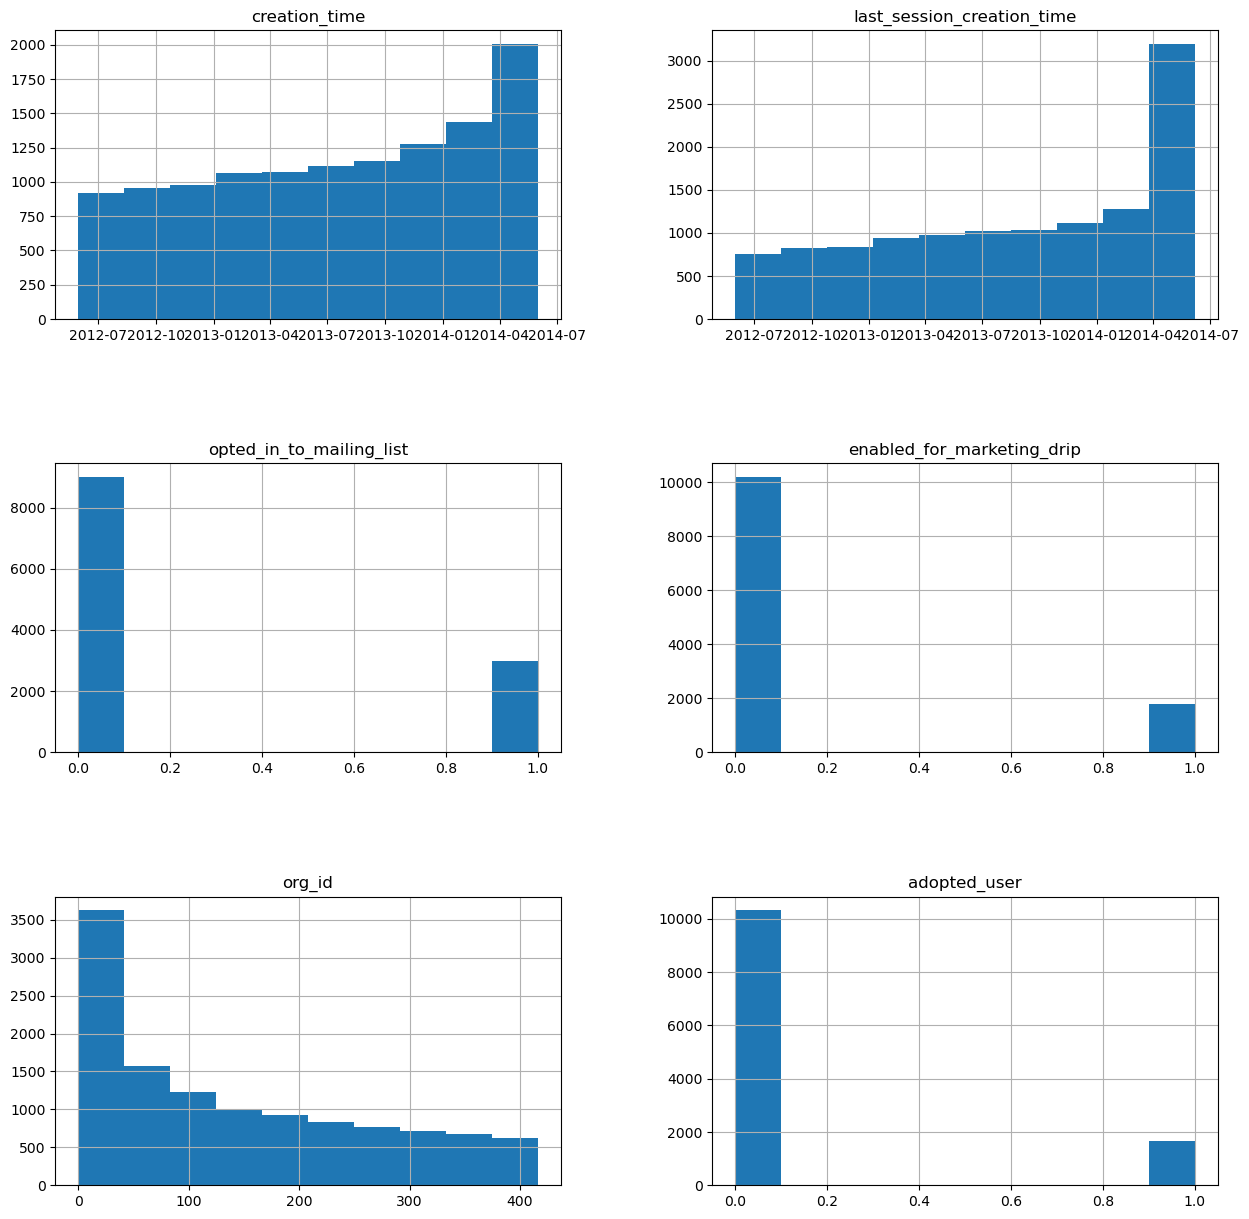

In [50]:
# Examine numeric variable distributions
data.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

There are definitely imbalances in the counts for categorical data, including the target column (adopted_user). This could create some issues, and would be worth further exploration given more time. One way to deal with these imbalances would be resampling of the data.

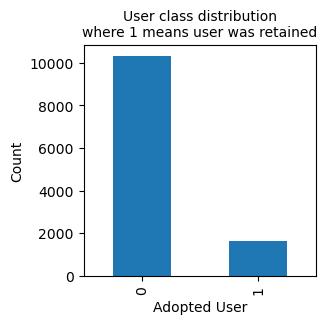

In [51]:
# Plot
fig, ax = plt.subplots(figsize=(3,3))

data.adopted_user.value_counts().plot(kind='bar')
ax.set_ylabel('Count')
ax.set_xlabel('Adopted User')
ax.set_title('User class distribution\nwhere 1 means user was retained',
              fontsize = 10)
plt.show()

### Feature Engineering

In [52]:
# Create a new column for time between creation and last login
data['days_since_user'] = (data['last_session_creation_time'] - data['creation_time']).dt.days
data.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,days_since_user
0,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,0
1,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,136
2,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,0
3,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1
4,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,5


In [53]:
max(data.creation_time)

Timestamp('2014-05-30 23:59:19')

In [54]:
min(data.creation_time)

Timestamp('2012-05-31 00:43:27')

In [55]:
# Create a new column for year when account created
data['year_created'] = data['creation_time'].dt.year.astype('object')
data.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,days_since_user,year_created
0,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,0,2014
1,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,136,2013
2,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,0,2013
3,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1,2013
4,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,5,2013


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11980 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               11980 non-null  datetime64[ns]
 1   creation_source             11980 non-null  object        
 2   last_session_creation_time  11980 non-null  datetime64[ns]
 3   opted_in_to_mailing_list    11980 non-null  int64         
 4   enabled_for_marketing_drip  11980 non-null  int64         
 5   org_id                      11980 non-null  int64         
 6   invited_by_user_id          11980 non-null  object        
 7   adopted_user                11980 non-null  int64         
 8   days_since_user             11980 non-null  int64         
 9   year_created                11980 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 1.0+ MB


In [57]:
# Drop datetime columns from dataframe
data_mod = data.drop(['creation_time', 'last_session_creation_time'], axis=1)
data_mod

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,days_since_user,year_created
0,GUEST_INVITE,1,0,11,10803.0,0,0,2014
1,ORG_INVITE,0,0,1,316.0,1,136,2013
2,ORG_INVITE,0,0,94,1525.0,0,0,2013
3,GUEST_INVITE,0,0,1,5151.0,0,1,2013
4,GUEST_INVITE,0,0,193,5240.0,0,5,2013
...,...,...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,8263.0,0,0,2013
11996,SIGNUP_GOOGLE_AUTH,0,0,200,Unknown,0,5,2013
11997,GUEST_INVITE,1,1,83,8074.0,0,0,2014
11998,PERSONAL_PROJECTS,0,0,6,Unknown,0,2,2012


In [58]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11980 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   creation_source             11980 non-null  object
 1   opted_in_to_mailing_list    11980 non-null  int64 
 2   enabled_for_marketing_drip  11980 non-null  int64 
 3   org_id                      11980 non-null  int64 
 4   invited_by_user_id          11980 non-null  object
 5   adopted_user                11980 non-null  int64 
 6   days_since_user             11980 non-null  int64 
 7   year_created                11980 non-null  object
dtypes: int64(5), object(3)
memory usage: 842.3+ KB


In [59]:
data_mod['invited_by_user_id'].value_counts()

Unknown    5571
10741.0      13
2527.0       12
1525.0       11
2308.0       11
           ... 
1390.0        1
5445.0        1
8526.0        1
4695.0        1
5450.0        1
Name: invited_by_user_id, Length: 2563, dtype: int64

Everything is looking good except the invited_by_user_id column, which is object data type because it contains both object_id numbers and values of "unknown" where there was missing data. <br> 
<br> 
The best options at this point are to either remove rows where the object_id was unknown, or remove the column entirely. I'm going to drop this column because it's unlikely to be important in the model, and I don't want to lose 5571 rows of data from the other columns. This is something that could be revisited later.

In [60]:
data_mod = data_mod.drop(['invited_by_user_id'], axis=1)
data_mod

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,days_since_user,year_created
0,GUEST_INVITE,1,0,11,0,0,2014
1,ORG_INVITE,0,0,1,1,136,2013
2,ORG_INVITE,0,0,94,0,0,2013
3,GUEST_INVITE,0,0,1,0,1,2013
4,GUEST_INVITE,0,0,193,0,5,2013
...,...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,0,0,2013
11996,SIGNUP_GOOGLE_AUTH,0,0,200,0,5,2013
11997,GUEST_INVITE,1,1,83,0,0,2014
11998,PERSONAL_PROJECTS,0,0,6,0,2,2012


## Part 3 - Modeling
With the target variable of "adopted user" (a user who has logged into the product on three separate days in at least one seven day period), identify which factors predict future user adoption.

This is a binary classification problem, so we'll try out a logistic regression classifier first.

In [61]:
# Load packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer


In [62]:
data_mod.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,days_since_user,year_created
0,GUEST_INVITE,1,0,11,0,0,2014
1,ORG_INVITE,0,0,1,1,136,2013
2,ORG_INVITE,0,0,94,0,0,2013
3,GUEST_INVITE,0,0,1,0,1,2013
4,GUEST_INVITE,0,0,193,0,5,2013


In [63]:
# Testing out modeling pipeline without 'days_since_user' feature

#dat_new = data_mod.drop(['days_since_user'], axis=1)
#dat_new.head()

In [64]:
# Define target (y-variable)
target_name = "adopted_user"
target = data_mod[target_name]

dat = data_mod.drop(columns=[target_name])
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11980 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   creation_source             11980 non-null  object
 1   opted_in_to_mailing_list    11980 non-null  int64 
 2   enabled_for_marketing_drip  11980 non-null  int64 
 3   org_id                      11980 non-null  int64 
 4   days_since_user             11980 non-null  int64 
 5   year_created                11980 non-null  object
dtypes: int64(4), object(2)
memory usage: 655.2+ KB


In [65]:
# Select columns based on data type (categorical)
numerical_columns_selector = selector(dtype_exclude=[object])
categorical_columns_selector = selector(dtype_include=[object])

numerical_features = numerical_columns_selector(dat) # apply StandardScalar
categorical_features = categorical_columns_selector(dat) # one-hot-encode these features

print('Numerical features:', numerical_features)
print('Categorical features:', categorical_features)

Numerical features: ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'days_since_user']
Categorical features: ['creation_source', 'year_created']


In [66]:
# Create the preprocessors for the numerical and categorical columns 
preprocessor = ColumnTransformer(
    transformers=[
        ('standard-scaler', StandardScaler(), numerical_features), 
        ('one-hot-encoder', OneHotEncoder(handle_unknown="ignore"), categorical_features)],
    remainder='passthrough')

In [67]:
# First split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(dat, target,
                                            test_size=0.2, 
                                            random_state=43)

In [68]:
# Check shape of data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9584, 6)
(2396, 6)
(9584,)
(2396,)


In [69]:
# Process the data using ColumnTransformer
X_tr = preprocessor.fit_transform(X_train)
X_te = preprocessor.transform(X_test)
y_tr = y_train
y_te = y_test

In [70]:
# Instantiate model
lrmod = LogisticRegression()

# Fit and predict
lrmod.fit(X_tr, y_tr)
y_pred = lrmod.predict(X_te)

In [71]:
print("Accuracy score (train): {0:.3f}".format(lrmod.score(X_tr, y_tr)))
print("Accuracy score (test): {0:.3f}".format(lrmod.score(X_te, y_te)))

Accuracy score (train): 0.975
Accuracy score (test): 0.970


In [72]:
# Classification report
target_names = ['Not Adopted', 'Adopted']
print(classification_report(y_te, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Adopted       0.98      0.99      0.98      2069
     Adopted       0.93      0.84      0.88       327

    accuracy                           0.97      2396
   macro avg       0.95      0.92      0.93      2396
weighted avg       0.97      0.97      0.97      2396



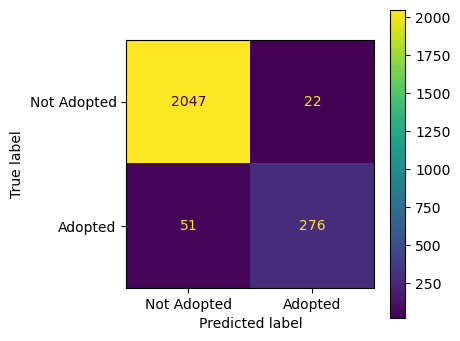

In [73]:
cm = confusion_matrix(y_te, y_pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = target_names)

fig, ax = plt.subplots(figsize=(4,4))
display_cm.plot(ax=ax)
plt.show()

In [74]:
# Visualize feature importances
preprocessor.transformers_

[('standard-scaler',
  StandardScaler(),
  ['opted_in_to_mailing_list',
   'enabled_for_marketing_drip',
   'org_id',
   'days_since_user']),
 ('one-hot-encoder',
  OneHotEncoder(handle_unknown='ignore'),
  ['creation_source', 'year_created'])]

In [75]:
# Extract feature names from ColumnTransformer
feature_names = []
for name, transformer, features in preprocessor.transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        feature_names.extend(
            [f"{name}_{f}" for f in transformer.get_feature_names_out(features)])
    else:
        feature_names.extend(features)
print(feature_names)
type(feature_names)

['standard-scaler_opted_in_to_mailing_list', 'standard-scaler_enabled_for_marketing_drip', 'standard-scaler_org_id', 'standard-scaler_days_since_user', 'one-hot-encoder_creation_source_GUEST_INVITE', 'one-hot-encoder_creation_source_ORG_INVITE', 'one-hot-encoder_creation_source_PERSONAL_PROJECTS', 'one-hot-encoder_creation_source_SIGNUP', 'one-hot-encoder_creation_source_SIGNUP_GOOGLE_AUTH', 'one-hot-encoder_year_created_2012', 'one-hot-encoder_year_created_2013', 'one-hot-encoder_year_created_2014']


list

In [76]:
# Replace substring in list of strings
f1 = [x.replace("standard-scaler_", "") for x in feature_names]
f2 = [x.replace("one-hot-encoder_", "") for x in f1]

print(f2)

['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'days_since_user', 'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH', 'year_created_2012', 'year_created_2013', 'year_created_2014']


In [77]:
# The estimated coefficients will all be around 1:
importances = lrmod.coef_
print(importances)


[[ 0.14415467 -0.02207664  0.18834641  8.17155003  0.08188283  0.03415417
  -0.17719239 -0.12156213  0.18296207 -0.04524974 -0.44557662  0.49107091]]


''

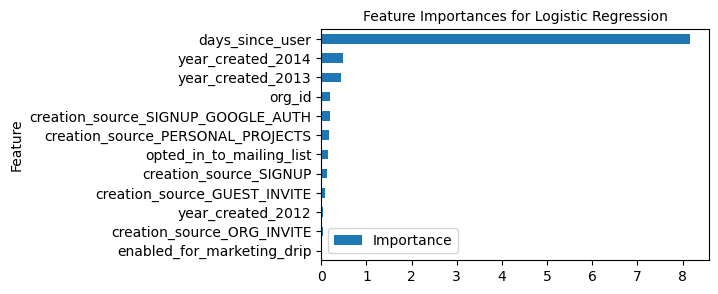

In [80]:
features = f2
coefficients = lrmod.coef_[0]

feature_importance = pd.DataFrame({'Feature': features, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 3))
plt.title('Feature Importances for Logistic Regression', fontsize=10)
;

In [79]:
feature_importance_table = pd.DataFrame({'Feature': features, 'Importance': coefficients})
feature_importance_table.sort_values('Importance', ascending=False)


,Feature,Importance
3,days_since_user,8.171550
11,year_created_2014,0.491071
2,org_id,0.188346
8,creation_source_SIGNUP_GOOGLE_AUTH,0.182962
0,opted_in_to_mailing_list,0.144155
4,creation_source_GUEST_INVITE,0.081883
5,creation_source_ORG_INVITE,0.034154
1,enabled_for_marketing_drip,-0.022077
9,year_created_2012,-0.045250
7,creation_source_SIGNUP,-0.121562
